In [67]:
# library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from datetime import datetime, timedelta
import seaborn as sns
from sklearn.metrics import silhouette_score
import plotly.offline as pyoff
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler

# Load data

In [68]:
df=pd.read_csv(r"C:\Users\NAM\Downloads\bank_transactions.csv\bank_transactions.csv")
df.head()

TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053     10/1/94          F   JAMSHEDPUR   
1            T2   C2142763      4/4/57          M      JHAJJAR   
2            T3   C4417068    26/11/96          F       MUMBAI   
3            T4   C5342380     14/9/73          F       MUMBAI   
4            T5   C9031234     24/3/88          F  NAVI MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
1             2270.69          2/8/16           141858   
2            17874.44          2/8/16           142712   
3           866503.21          2/8/16           142714   
4             6714.43          2/8/16           181156   

   TransactionAmount (INR)  
0                     25.0  
1                  27999.0  
2                    459.0  
3                   2060.0  
4                   1762.5

# EDA

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [70]:
df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

### Info columns of data
- TransactionID: Mã giao dịch duy nhất.

- CustomerID: Mã khách hàng duy nhất.

- CustomerDOB: Ngày sinh khách hàng (tính độ tuổi).

- CustGender: Giới tính khách hàng.

- CustLocation: Địa điểm khách hàng.

- CustAccountBalance: Số dư tài khoản khách hàng.

- TransactionDate: Ngày giao dịch.

- TransactionTime: Thời gian giao dịch.

- TransactionAmount (INR): Số tiền giao dịch (INR).

In [71]:
df.shape

(1048567, 9)

In [72]:
# include number
df.describe()

CustAccountBalance  TransactionTime  TransactionAmount (INR)
count        1.046198e+06     1.048567e+06             1.048567e+06
mean         1.154035e+05     1.570875e+05             1.574335e+03
std          8.464854e+05     5.126185e+04             6.574743e+03
min          0.000000e+00     0.000000e+00             0.000000e+00
25%          4.721760e+03     1.240300e+05             1.610000e+02
50%          1.679218e+04     1.642260e+05             4.590300e+02
75%          5.765736e+04     2.000100e+05             1.200000e+03
max          1.150355e+08     2.359590e+05             1.560035e+06

In [73]:
# include object
df.describe(include='O')

TransactionID CustomerID CustomerDOB CustGender CustLocation  \
count        1048567    1048567     1045170    1047467      1048416   
unique       1048567     884265       17254          3         9355   
top               T1   C5533885    1/1/1800          M       MUMBAI   
freq               1          6       57339     765530       103595   

       TransactionDate  
count          1048567  
unique              55  
top             7/8/16  
freq             27261

In [74]:
# check duplicate
df.duplicated().sum()

0

In [75]:
# check null values
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [76]:
# percentage of null values
print(df.isnull().sum()/ len(df)*100)
print('-'*20)
print(df.duplicated().sum())

TransactionID              0.000000
CustomerID                 0.000000
CustomerDOB                0.323966
CustGender                 0.104905
CustLocation               0.014401
CustAccountBalance         0.225927
TransactionDate            0.000000
TransactionTime            0.000000
TransactionAmount (INR)    0.000000
dtype: float64
--------------------
0


In [77]:
# num_col = df.select_dtypes(include=np.number)
# for col in num_col.columns:
#     plt.figure(figsize=(10, 4))
#     plt.subplot(1, 2, 1)
#     sns.boxplot(x=df[col])
#     plt.title(f'Boxplot of {col}')
#     plt.show()


In [78]:
df['CustGender'].value_counts()

CustGender
M    765530
F    281936
T         1
Name: count, dtype: int64

# Data cleanning

In [79]:
# handle missing values
df.dropna(inplace=True)

In [80]:
# handle values in CustGender
df.drop(df[df['CustGender'].isin(['T'])].index,axis=0,inplace=True)

In [81]:
df['CustGender'].unique()

array(['F', 'M'], dtype=object)

In [82]:
# convert to datetime
df.CustomerDOB = pd.to_datetime(df.CustomerDOB,errors='coerce')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'],errors='coerce')

C:\Users\NAM\AppData\Local\Temp\ipykernel_5388\2468783878.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\NAM\AppData\Local\Temp\ipykernel_5388\2468783878.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [83]:
# calculate age customer
from datetime import date
def age(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

In [84]:
df['Age'] = df.CustomerDOB.apply(age)
df['Age'].value_counts()

Age
 34    72711
 35    70686
 33    70608
 36    64358
 32    62744
       ...  
 10        4
-1         3
 2         3
 0         1
 7         1
Name: count, Length: 99, dtype: int64

<Axes: ylabel='Age'>

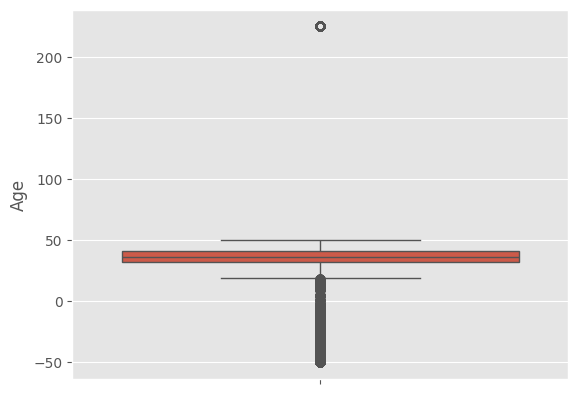

In [85]:
sns.boxplot(df['Age'])

In [86]:
# age < 0 drop
df = df[df['Age']>0]
df.drop('CustomerDOB',axis=1,inplace=True)
df.shape

(936822, 9)

In [87]:
# drop columns not important
df.drop(['TransactionID','TransactionTime'],axis=1,inplace=True)

In [88]:
df.head()

CustomerID CustGender CustLocation  CustAccountBalance TransactionDate  \
0   C5841053          F   JAMSHEDPUR            17819.05      2016-02-08   
2   C4417068          F       MUMBAI            17874.44      2016-02-08   
4   C9031234          F  NAVI MUMBAI             6714.43      2016-02-08   
6   C7126560          F       MUMBAI              973.46      2016-02-08   
7   C1220223          M       MUMBAI            95075.54      2016-02-08   

   TransactionAmount (INR)  Age  
0                     25.0   30  
2                    459.0   28  
4                   1762.5   37  
6                    566.0   33  
7                    148.0   43

# RFM analysis

In [89]:
# calculate Monetary
mon = df.groupby('CustomerID')['TransactionAmount (INR)'].sum() 
rfm_m = mon.reset_index() 
rfm_m.columns = ['CustomerID', 'Monetary' ]
rfm_m 

CustomerID  Monetary
0        C1010011    5106.0
1        C1010012    1499.0
2        C1010014    1455.0
3        C1010018      30.0
4        C1010028     557.0
...           ...       ...
803669   C9099836     691.0
803670   C9099877     222.0
803671   C9099919     126.0
803672   C9099941      50.0
803673   C9099956     855.0

[803674 rows x 2 columns]

In [90]:
# calculate Frequency
rfm_f = df.groupby('CustomerID')['TransactionAmount (INR)'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

CustomerID  Frequency
0   C1010011          2
1   C1010012          1
2   C1010014          2
3   C1010018          1
4   C1010028          1

In [91]:
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head() 

CustomerID  Monetary  Frequency
0   C1010011    5106.0          2
1   C1010012    1499.0          1
2   C1010014    1455.0          2
3   C1010018      30.0          1
4   C1010028     557.0          1

In [92]:
# calculate Recency
# Compute the maximum date to know the last transaction date
max_date = max(df['TransactionDate'])
# Compute the difference between max date and transaction date
df['difference'] = (max_date - df['TransactionDate']).dt.days
# Compute last transaction date to get the recency of customers
rfm_r = df.groupby('CustomerID')['difference'].min()
rfm_r = rfm_r.reset_index()
rfm_r.head()

CustomerID  difference
0   C1010011          74
1   C1010012         117
2   C1010014         154
3   C1010018          85
4   C1010028         102

In [93]:
rfm = pd.merge(rfm, rfm_r, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Monetary', 'Frequency', 'Recency']
rfm.head() 

CustomerID  Monetary  Frequency  Recency
0   C1010011    5106.0          2       74
1   C1010012    1499.0          1      117
2   C1010014    1455.0          2      154
3   C1010018      30.0          1       85
4   C1010028     557.0          1      102

In [94]:
df  = pd.merge(df, rfm , on='CustomerID', how='inner') 
df.head()

CustomerID CustGender CustLocation  CustAccountBalance TransactionDate  \
0   C5841053          F   JAMSHEDPUR            17819.05      2016-02-08   
1   C4417068          F       MUMBAI            17874.44      2016-02-08   
2   C9031234          F  NAVI MUMBAI             6714.43      2016-02-08   
3   C7126560          F       MUMBAI              973.46      2016-02-08   
4   C1220223          M       MUMBAI            95075.54      2016-02-08   

   TransactionAmount (INR)  Age  difference  Monetary  Frequency  Recency  
0                     25.0   30         305      25.0          1      305  
1                    459.0   28         305     459.0          1      305  
2                   1762.5   37         305    1762.5          1      305  
3                    566.0   33         305     821.0          4       61  
4                    148.0   43         305     148.0          1      305

In [95]:
df.drop(columns=['difference' , 'CustomerID'], inplace= True  , axis=1 )
df.drop_duplicates(inplace= True )

In [96]:
df.head()

CustGender CustLocation  CustAccountBalance TransactionDate  \
0          F   JAMSHEDPUR            17819.05      2016-02-08   
1          F       MUMBAI            17874.44      2016-02-08   
2          F  NAVI MUMBAI             6714.43      2016-02-08   
3          F       MUMBAI              973.46      2016-02-08   
4          M       MUMBAI            95075.54      2016-02-08   

   TransactionAmount (INR)  Age  Monetary  Frequency  Recency  
0                     25.0   30      25.0          1      305  
1                    459.0   28     459.0          1      305  
2                   1762.5   37    1762.5          1      305  
3                    566.0   33     821.0          4       61  
4                    148.0   43     148.0          1      305

In [97]:
#slpit the day & month names from the date 
df['TransactionMonth'] = df.TransactionDate.dt.month
df['TransactionMonthName'] = df.TransactionDate.dt.month_name()
df['TransactionDay'] = df.TransactionDate.dt.day
df['TransactionDayName'] = df.TransactionDate.dt.day_name()

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 913947 entries, 0 to 936821
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CustGender               913947 non-null  object        
 1   CustLocation             913947 non-null  object        
 2   CustAccountBalance       913947 non-null  float64       
 3   TransactionDate          913947 non-null  datetime64[ns]
 4   TransactionAmount (INR)  913947 non-null  float64       
 5   Age                      913947 non-null  int64         
 6   Monetary                 913947 non-null  float64       
 7   Frequency                913947 non-null  int64         
 8   Recency                  913947 non-null  int64         
 9   TransactionMonth         913947 non-null  int32         
 10  TransactionMonthName     913947 non-null  object        
 11  TransactionDay           913947 non-null  int32         
 12  TransactionDayName   

In [99]:
df.describe()

CustAccountBalance                TransactionDate  \
count        9.139470e+05                         913947   
mean         8.914233e+04  2016-07-25 11:02:26.871974400   
min          0.000000e+00            2016-01-08 00:00:00   
25%          4.418950e+03            2016-06-09 00:00:00   
50%          1.540555e+04            2016-08-20 00:00:00   
75%          5.062919e+04            2016-09-09 00:00:00   
max          5.536969e+07            2016-12-09 00:00:00   
std          4.605468e+05                            NaN   

       TransactionAmount (INR)            Age      Monetary      Frequency  \
count             9.139470e+05  913947.000000  9.139470e+05  913947.000000   
mean              1.390340e+03      48.153084  1.850825e+03       1.327654   
min               0.000000e+00       1.000000  0.000000e+00       1.000000   
25%               1.500000e+02      33.000000  2.057700e+02       1.000000   
50%               4.190000e+02      37.000000  5.980000e+02       1.000000   
75%               1.091220e+03      42.000000  1.598000e+03       2.000000   
max               1.560035e+06     225.000000  1.560035e+06       6.000000   
std               5.886170e+03      44.709421  6.748783e+03       0.582795   

             Recency  TransactionMonth  TransactionDay  
count  913947.000000     913947.000000   913947.000000  
mean      123.702330          7.343049       14.402227  
min         0.000000          1.000000        8.000000  
25%        85.000000          6.000000        8.000000  
50%       107.000000          8.000000        9.000000  
75%       123.000000          9.000000       20.000000  
max       336.000000         12.000000       31.000000  
std        78.255397          2.640149        7.295221

# Data Visualization

In [100]:
df.head()

CustGender CustLocation  CustAccountBalance TransactionDate  \
0          F   JAMSHEDPUR            17819.05      2016-02-08   
1          F       MUMBAI            17874.44      2016-02-08   
2          F  NAVI MUMBAI             6714.43      2016-02-08   
3          F       MUMBAI              973.46      2016-02-08   
4          M       MUMBAI            95075.54      2016-02-08   

   TransactionAmount (INR)  Age  Monetary  Frequency  Recency  \
0                     25.0   30      25.0          1      305   
1                    459.0   28     459.0          1      305   
2                   1762.5   37    1762.5          1      305   
3                    566.0   33     821.0          4       61   
4                    148.0   43     148.0          1      305   

   TransactionMonth TransactionMonthName  TransactionDay TransactionDayName  
0                 2             February               8             Monday  
1                 2             February               8             Monday  
2                 2             February               8             Monday  
3                 2             February               8             Monday  
4                 2             February               8             Monday

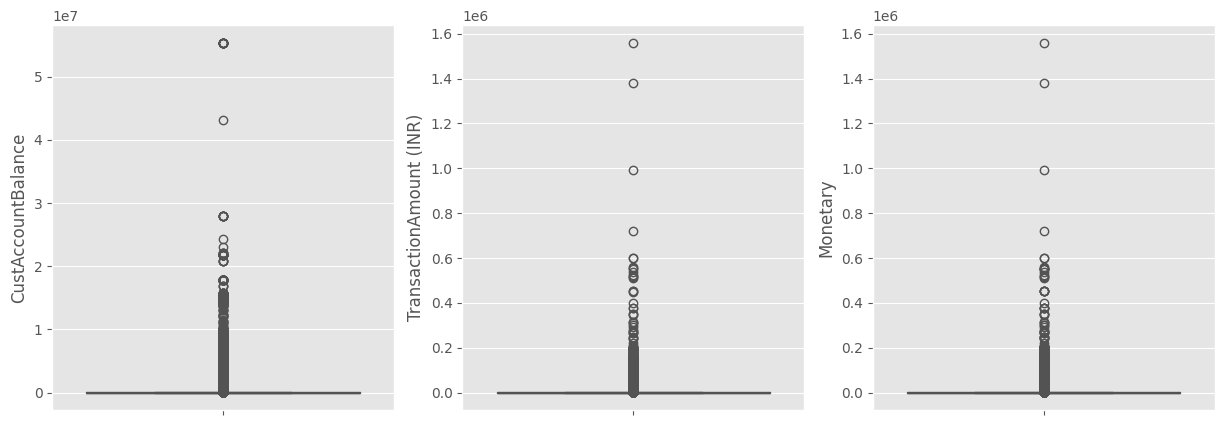

In [101]:
plt.style.use('ggplot')
fig , (ax1, ax2 , ax3) = plt.subplots(nrows = 1 , ncols = 3 , figsize=(15,5))
ax = sns.boxplot(df['CustAccountBalance'],ax=ax1)
ax = sns.boxplot(df['TransactionAmount (INR)'] , ax=ax2)
ax = sns.boxplot(df['Monetary'] , ax=ax3)

C:\Users\NAM\AppData\Local\Temp\ipykernel_5388\3114475994.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




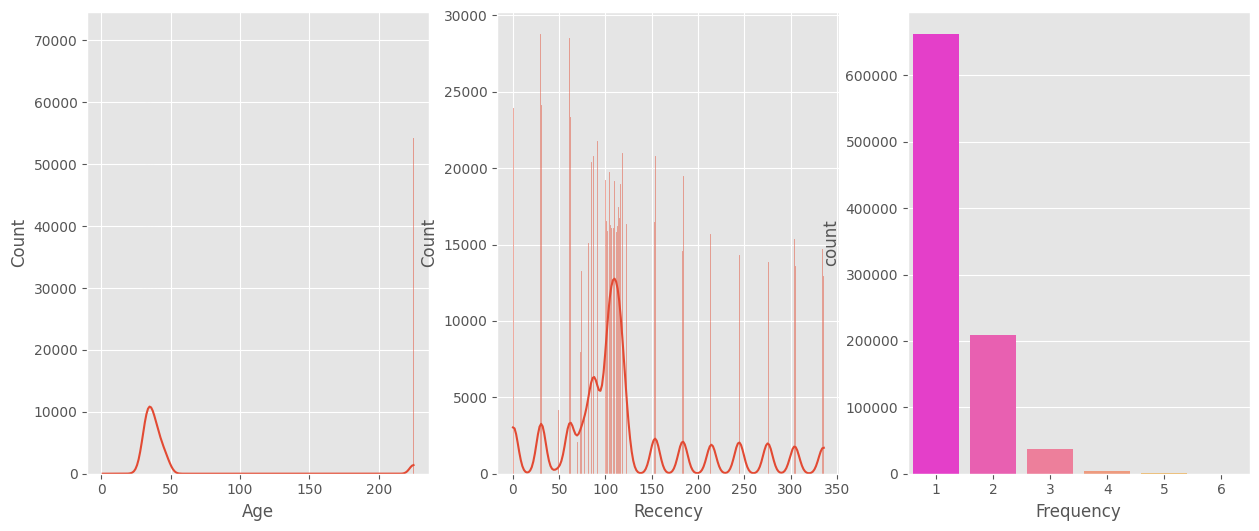

In [102]:
plt.style.use('ggplot')
fig , (ax1,ax2,ax3) = plt.subplots(nrows = 1 , ncols = 3, figsize=(15,6))
ax = sns.histplot(df['Age'],ax=ax1,kde=True)
ax = sns.histplot(df['Recency'],ax=ax2 ,kde=True )
ax = sns.countplot(data=df,x='Frequency', order = df['Frequency'].value_counts().index,palette='spring',ax=ax3)

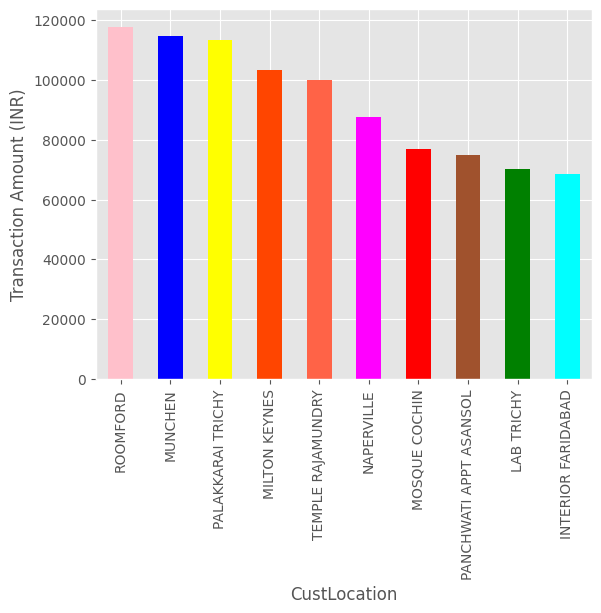

In [103]:
# bieu do cho biet so tien giao dich theo dia diem khach hang
df.groupby('CustLocation')['TransactionAmount (INR)'].mean().sort_values(ascending=False)[:10].plot(kind='bar',color=['pink','blue','yellow','orangered','tomato','magenta','red','sienna','green','cyan'])
plt.ylabel('Transaction Amount (INR)');

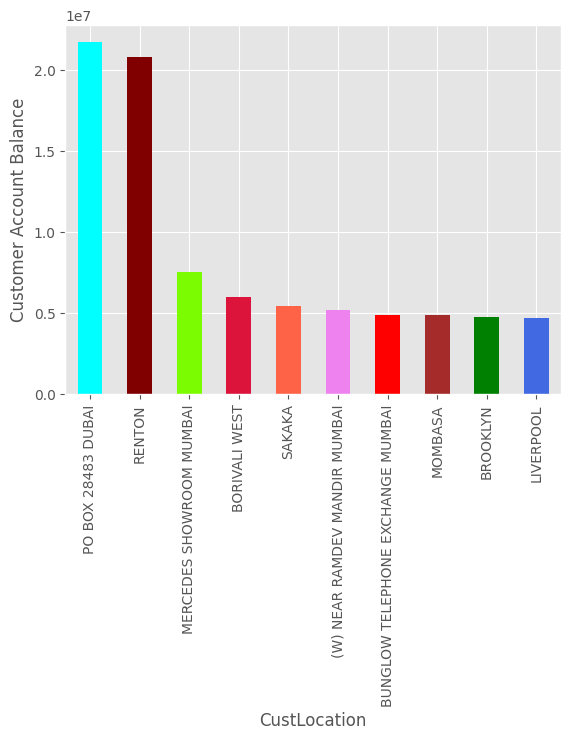

In [104]:
# bieu do cho biet so du tai khoan khach hang theo dia diem khach hang
df.groupby('CustLocation')['CustAccountBalance'].mean().sort_values(ascending=False)[:10].plot(kind='bar',color=['aqua','maroon','lawngreen','crimson','tomato','violet','red','brown','green','royalblue'])
plt.ylabel('Customer Account Balance');

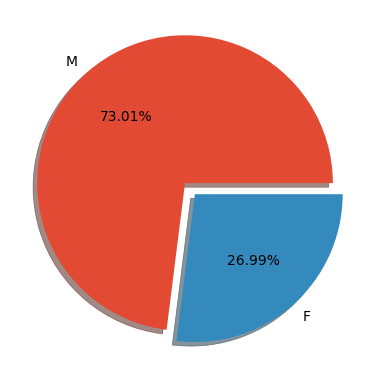

In [105]:
# bieu do gioi tinh khach hang
labels = df.CustGender.value_counts().keys()
values = df.CustGender.value_counts().values
explode = (0.1,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%');

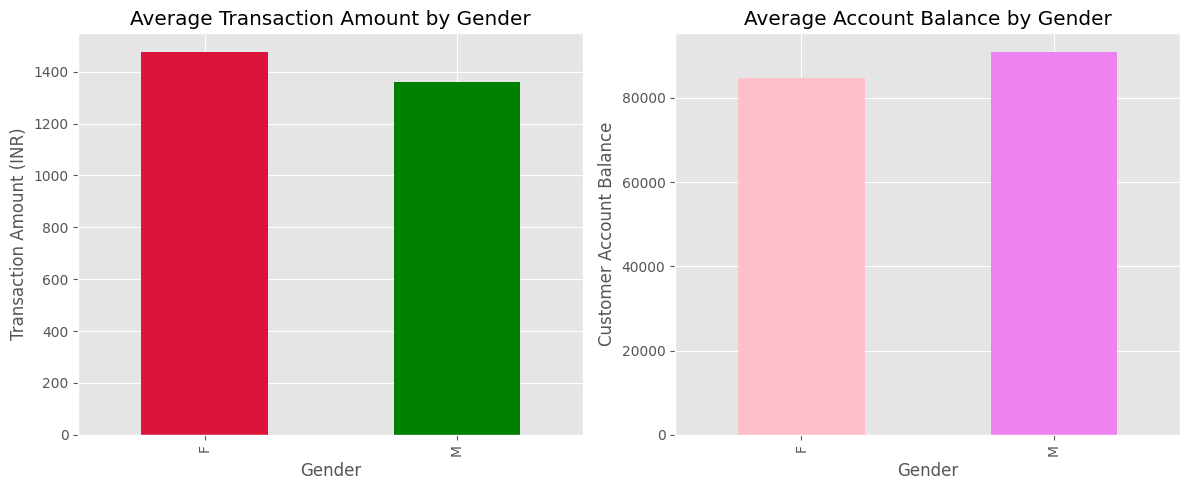

In [106]:
# bieu do so du tai khoan và so tien giao dich theo gioi tinh
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Subplot 1: Trung bình Transaction Amount theo Gender
df.groupby('CustGender')['TransactionAmount (INR)'].mean().plot(
    kind='bar', 
    color=['crimson', 'green'],
    ax=ax1
)
ax1.set_title('Average Transaction Amount by Gender')
ax1.set_ylabel('Transaction Amount (INR)')
ax1.set_xlabel('Gender')

# Subplot 2: Trung bình Account Balance theo Gender
df.groupby('CustGender')['CustAccountBalance'].mean().plot(
    kind='bar',
    color=['pink', 'violet'], 
    ax=ax2
)
ax2.set_title('Average Account Balance by Gender')
ax2.set_ylabel('Customer Account Balance')
ax2.set_xlabel('Gender')

# Điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()

In [107]:
# bieu do so luong giao dich thep ngay trong tuan
sns.barplot(data=df,x='TransactionDayName',y='TransactionAmount (INR)',palette='Set1',hue='CustGender')
plt.title('Weekday-Wise Comparison of Spending Habits of Male & Female Customers',fontsize=32,fontweight='bold',color='navy',pad=30);

In [108]:
# bieu do so luong giao dich va so du tai khoan theo thang
plt.figure(figsize=(24, 12))

# First subplot - Transaction Amount by Month and Gender
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='TransactionMonthName', y='TransactionAmount (INR)',
           palette='Set2', hue='CustGender')
plt.title('Monthly Comparison of Spending Habits\nMale & Female Customers',
         fontsize=24, fontweight='bold', color='navy', pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Transaction Amount (INR)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Gender', fontsize=12)

# Second subplot - Account Balance by Month and Gender
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='TransactionMonthName', y='CustAccountBalance',
           palette='Spectral', hue='CustGender')
plt.title('Monthly Comparison of Account Balances\nMale & Female Customers',
         fontsize=24, fontweight='bold', color='sienna', pad=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Gender', fontsize=12)

# Adjust layout and display
plt.tight_layout(pad=4)

In [109]:
sns.boxplot(x=df['CustGender'] ,y= df['Age'] );

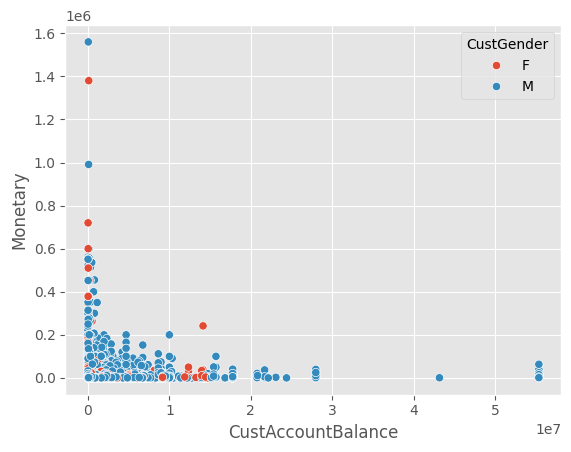

In [110]:
sns.scatterplot(x=df['CustAccountBalance'] , y=df['Monetary'] , hue=df['CustGender']);

# Data Preproccesing

In [111]:
df.columns

Index(['CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionAmount (INR)', 'Age', 'Monetary', 'Frequency', 'Recency',
       'TransactionMonth', 'TransactionMonthName', 'TransactionDay',
       'TransactionDayName'],
      dtype='object')

In [112]:
df_clean = df.drop(columns=['CustLocation','TransactionDate','TransactionDay','TransactionMonth',
                            'TransactionMonthName','TransactionDayName'] , axis=1)

In [113]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 913947 entries, 0 to 936821
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CustGender               913947 non-null  object 
 1   CustAccountBalance       913947 non-null  float64
 2   TransactionAmount (INR)  913947 non-null  float64
 3   Age                      913947 non-null  int64  
 4   Monetary                 913947 non-null  float64
 5   Frequency                913947 non-null  int64  
 6   Recency                  913947 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 55.8+ MB


In [114]:
num_col = df_clean.select_dtypes(include=np.number)
num_col.quantile([0.5,0.95])

CustAccountBalance  TransactionAmount (INR)    Age  Monetary  Frequency  \
0.50            15405.55                    419.0   37.0     598.0        1.0   
0.95           340680.59                   4750.0  225.0    6300.0        2.0   

      Recency  
0.50    107.0  
0.95    304.0

In [115]:
df_clean.shape

(913947, 7)

In [116]:
# func for removing the outliers
def remove_outliers(dataframe, col):
    q1 = dataframe[col].quantile(0.25)
    q3 = dataframe[col].quantile(0.75)
    iqr = q3 - q1
    min_val = q1 - 1.5 * iqr
    max_val = q3 + 1.5 * iqr
    dataframe=dataframe[(dataframe[col]< max_val) & (dataframe[col]> min_val)]
    return dataframe

In [117]:
df_clean['CustGender']= df_clean['CustGender'].map({'M':1,'F':0})

In [118]:
# from scipy.stats import probplot
# for col in df.columns:
#     if df[col].dtypes == np.float64:
#         print("Skewness of {}:".format(col),df[col].skew())
#         print("Kurtosis of {}:".format(col),df[col].kurt())
#         plt.figure(figsize=(3,3))
#         print("Distribution Plot of {}:".format(col))
#         sns.distplot(df[col])
#         plt.show()
#         print("Box Plot of {}:".format(col))
#         plt.figure(figsize=(3,3))
#         sns.boxplot(df[col])
#         plt.show()
#         print("Quantile-Quantile Plot of {}:".format(col))
#         plt.figure(figsize=(3,3))
#         probplot(df[col],plot=plt,rvalue=True)
#         plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

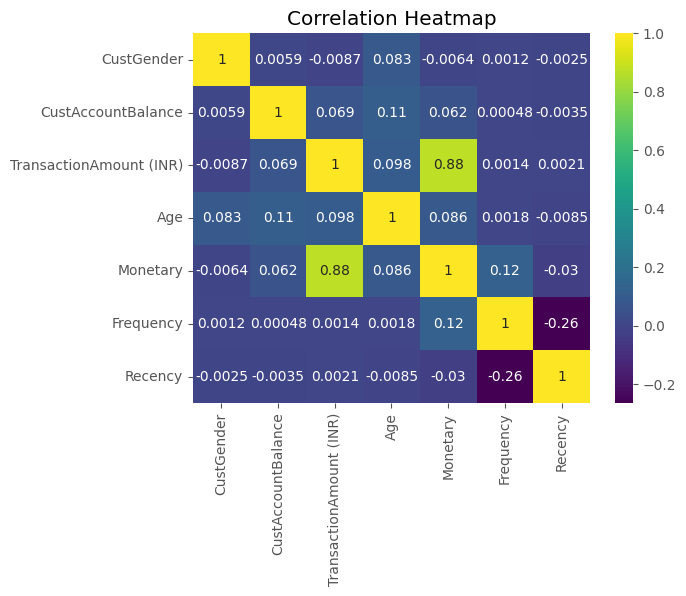

In [119]:
# numeric_df = df.select_dtypes(include=[np.number])

sns.heatmap(df_clean.corr(),annot=True,cmap='viridis')
plt.title('Correlation Heatmap')

In [120]:
# sns.clustermap(df_clean.corr(),row_cluster=False)

In [121]:
han_out=df_clean.copy()

In [122]:
han_out = remove_outliers(han_out , han_out.columns)


In [123]:
han_out.isnull().sum()

CustGender                      0
CustAccountBalance         118851
TransactionAmount (INR)     96438
Age                         54525
Monetary                    90776
Frequency                    5138
Recency                    236166
dtype: int64

In [124]:
# Impute từng cột quan trọng thay vì drop toàn bộ
han_out['CustAccountBalance'].fillna(han_out['CustAccountBalance'].median(), inplace=True)
han_out['TransactionAmount (INR)'] = han_out.groupby('CustGender')['TransactionAmount (INR)'].transform(lambda x: x.fillna(x.median()))
han_out['Age'].fillna(han_out['Age'].median(), inplace=True)

median_monetary = han_out['Monetary'].median()
han_out['Monetary'].fillna(median_monetary, inplace=True)
# Với Recency: Tạo cột flag và điền giá trị đặc biệt (ví dụ: -1)
han_out['is_new_customer'] = han_out['Recency'].isnull().astype(int)
han_out['Recency'].fillna(-1, inplace=True)

# Drop chỉ với Frequency (do tỷ lệ null rất thấp)
han_out.dropna(subset=['Frequency'], inplace=True)

C:\Users\NAM\AppData\Local\Temp\ipykernel_5388\3040338132.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\NAM\AppData\Local\Temp\ipykernel_5388\3040338132.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [125]:
# han_out.dropna(inplace=True)

In [126]:
df_cleand = han_out.copy()

In [127]:
df_cleand.isnull().sum()

CustGender                 0
CustAccountBalance         0
TransactionAmount (INR)    0
Age                        0
Monetary                   0
Frequency                  0
Recency                    0
is_new_customer            0
dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap')

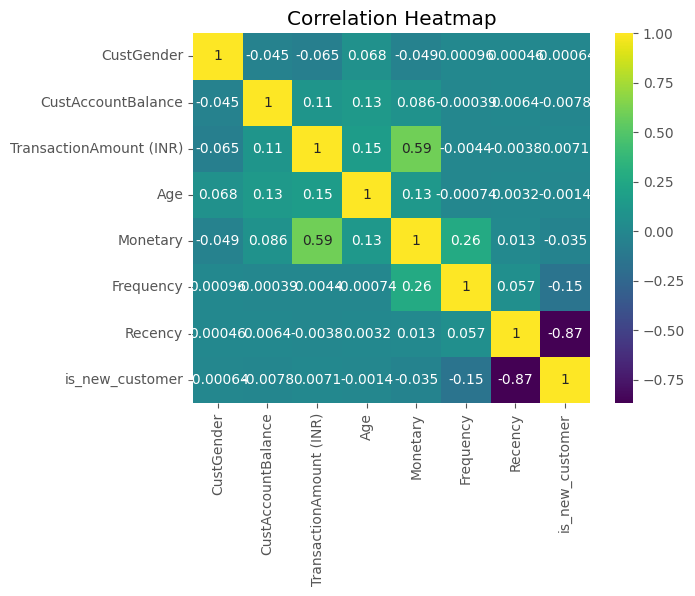

In [128]:
sns.heatmap(df_cleand.corr(),annot=True,cmap='viridis')
plt.title('Correlation Heatmap')

# scaler data

In [129]:
scaler = StandardScaler()
df_scaled= scaler.fit_transform(df_cleand)
df_scaled.shape

(908809, 8)

In [130]:
data_scaled = pd.DataFrame(df_scaled)
data_scaled.columns = df_cleand.columns
data_scaled

CustGender  CustAccountBalance  TransactionAmount (INR)       Age  \
0        -1.644654           -0.115390                -0.925566 -1.383266   
1        -1.644654           -0.113156                -0.136781 -1.781899   
2        -1.644654           -0.563232                 2.232299  0.011951   
3         0.608031            3.000314                -0.702016  1.207851   
4        -1.644654           -0.232832                 0.542955 -0.187366   
...            ...                 ...                      ...       ...   
908804    0.608031           -0.526098                 0.481161 -0.585999   
908805    0.608031            0.267431                -0.134964 -0.785316   
908806    0.608031           -0.363317                 0.428454 -0.386682   
908807    0.608031           -0.425973                 0.846473  1.805801   
908808    0.608031            2.220299                 1.148174  0.609901   

        Monetary  Frequency   Recency  is_new_customer  
0      -0.944916  -0.572276 -1.468606         1.692011  
1      -0.399444  -0.572276 -1.468606         1.692011  
2       1.238859  -0.572276 -1.468606         1.692011  
3      -0.790324  -0.572276 -1.468606         1.692011  
4       0.070618  -0.572276 -1.468606         1.692011  
...          ...        ...       ...              ...  
908804  0.027885  -0.572276  0.223880        -0.591013  
908805 -0.398187  -0.572276  0.223880        -0.591013  
908806 -0.008564  -0.572276  0.223880        -0.591013  
908807  0.280511  -0.572276  0.223880        -0.591013  
908808  0.878771   1.262159  0.223880        -0.591013  

[908809 rows x 8 columns]

# K-Means

In [131]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [132]:
df_scaled_kmeans=data_scaled.sample(n=100000,random_state=42)

In [133]:
df_scaled_kmeans.head()

CustGender  CustAccountBalance  TransactionAmount (INR)       Age  \
403623    0.608031           -0.473844                -0.611142 -0.386682   
651421   -1.644654            1.002366                 3.390939 -0.187366   
272235    0.608031           -0.363317                -0.416672  2.005118   
218494    0.608031           -0.213082                 0.699258 -0.984633   
599243    0.608031            0.206067                 0.301231 -0.785316   

        Monetary  Frequency   Recency  is_new_customer  
403623  0.086957   1.262159  0.325837        -0.591013  
651421  2.040100  -0.572276 -1.468606         1.692011  
272235  2.228627  -0.572276 -0.183948        -0.591013  
218494  0.178707  -0.572276  1.692060        -0.591013  
599243 -0.096543  -0.572276  0.590925        -0.591013

In [134]:
df_scaled_dbscan=data_scaled.sample(n=100000,random_state=42)

In [135]:
df_scaled_dbscan.head()

CustGender  CustAccountBalance  TransactionAmount (INR)       Age  \
403623    0.608031           -0.473844                -0.611142 -0.386682   
651421   -1.644654            1.002366                 3.390939 -0.187366   
272235    0.608031           -0.363317                -0.416672  2.005118   
218494    0.608031           -0.213082                 0.699258 -0.984633   
599243    0.608031            0.206067                 0.301231 -0.785316   

        Monetary  Frequency   Recency  is_new_customer  
403623  0.086957   1.262159  0.325837        -0.591013  
651421  2.040100  -0.572276 -1.468606         1.692011  
272235  2.228627  -0.572276 -0.183948        -0.591013  
218494  0.178707  -0.572276  1.692060        -0.591013  
599243 -0.096543  -0.572276  0.590925        -0.591013

In [136]:
# Kmeans algorithm settings
kmeans_set = {"init":"random", "max_iter":100, "random_state":42}

inertias = []
silhouette_coefficients = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)    
    kmeans.fit(df_scaled_kmeans)
    inertias.append(kmeans.inertia_)
    score=silhouette_score(df_scaled_kmeans, kmeans.labels_)
    silhouette_coefficients.append(score)

In [137]:
from kneed import KneeLocator
plt.style.use("fivethirtyeight")
fig,ax=plt.subplots(1,2,figsize=(20,5))
kl = KneeLocator(range(2,11), inertias, curve='convex', direction="decreasing")
ax[0].plot(range(2,11), inertias,color='purple',marker='o',label='Elbow Method')
ax[0].set_xticks(range(2,11))
ax[0].set_xlabel("Number of Clusters", labelpad=20)
ax[0].set_ylabel("Inertia", labelpad=20)
ax[0].set_title("Elbow Method")
ax[0].axvline(x=kl.elbow, color='black', label='axvline-fullheight', ls='--', linewidth=3)

ax[1].plot(range(2,11), silhouette_coefficients,color='purple',marker='o',label='silhouette coefficients')
ax[1].set_xticks(range(2,11))
ax[1].set_title("silhouette values")
ax[1].set_xlabel("Number of clusters")
ax[1].set_ylabel("silhouette_coefficients")
plt.tight_layout();

In [138]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(30,10))
z = sch.linkage(df_scaled_kmeans.iloc[:500,:], 'ward')
sch.dendrogram(z);

In [139]:
kmeans = KMeans(n_clusters=5 , **kmeans_set)    
kmeans.fit(df_scaled_kmeans)
labels = kmeans.labels_

In [140]:
silhouette_avg = silhouette_score(df_scaled_kmeans,labels)
print(f"Chỉ số Silhouette trung bình: {silhouette_avg}")

Chỉ số Silhouette trung bình: 0.2544491699012627


In [141]:
df_scaled_kmeans['cluster']=labels
df_scaled_kmeans.head()

CustGender  CustAccountBalance  TransactionAmount (INR)       Age  \
403623    0.608031           -0.473844                -0.611142 -0.386682   
651421   -1.644654            1.002366                 3.390939 -0.187366   
272235    0.608031           -0.363317                -0.416672  2.005118   
218494    0.608031           -0.213082                 0.699258 -0.984633   
599243    0.608031            0.206067                 0.301231 -0.785316   

        Monetary  Frequency   Recency  is_new_customer  cluster  
403623  0.086957   1.262159  0.325837        -0.591013        0  
651421  2.040100  -0.572276 -1.468606         1.692011        4  
272235  2.228627  -0.572276 -0.183948        -0.591013        4  
218494  0.178707  -0.572276  1.692060        -0.591013        3  
599243 -0.096543  -0.572276  0.590925        -0.591013        3

In [142]:
df_scaled_kmeans['cluster'].value_counts()

cluster
3    30668
2    23743
0    16077
1    15828
4    13684
Name: count, dtype: int64

In [143]:
sns.pairplot(df_scaled_kmeans,hue='cluster');

In [144]:
df_scaled_kmeans.columns

Index(['CustGender', 'CustAccountBalance', 'TransactionAmount (INR)', 'Age',
       'Monetary', 'Frequency', 'Recency', 'is_new_customer', 'cluster'],
      dtype='object')

In [145]:
# 
cluster_colors = {0: '#1f77b4',  # xanh 
                  1: '#ff7f0e',  # cam
                  2: '#2ca02c',  # xanh la
                  3: '#d62728',
                  4: '#9467bd'}  # đỏ
# tạo một từ điển ánh xạ màu cho các cụm    
# ánh xạ màu cho các cụm
colors = df_scaled_kmeans['cluster'].map(cluster_colors)

# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(projection='3d')

# scatter = ax.scatter(df_scaled_kmeans['Monetary'], 
#                      df_scaled_kmeans['Frequency'], 
#                      df_scaled_kmeans['Recency'], 
#                      c=colors, 
#                      marker='o')

# ax.set_xlabel('Monetary Value')
# ax.set_ylabel('Frequency')
# ax.set_zlabel('Recency')

# ax.set_title('3D Scatter Plot of Customer Data by Cluster')

In [146]:
# # violin plot
# plt.figure(figsize=(10, 15))
# # Monetary Value
# plt.subplot(3, 1, 1)
# sns.violinplot(x=df_scaled_kmeans['cluster'], y=df_scaled_kmeans['Monetary'], palette=cluster_colors, hue=df_scaled_kmeans["cluster"])
# sns.violinplot(y=df_scaled_kmeans['Monetary'], color='gray', linewidth=1.0)
# plt.title('Monetary Value by Cluster')
# plt.ylabel('Monetary Value')
# # Frequency
# plt.subplot(3, 1, 2)
# sns.violinplot(x=df_scaled_kmeans['cluster'], y=df_scaled_kmeans['Frequency'], palette=cluster_colors, hue=df_scaled_kmeans["cluster"])
# sns.violinplot(y=df_scaled_kmeans['Frequency'], color='gray', linewidth=1.0)
# plt.title('Frequency by Cluster')
# plt.ylabel('Frequency')

# # Recency
# plt.subplot(3, 1, 3)
# sns.violinplot(x=df_scaled_kmeans['cluster'], y=df_scaled_kmeans['Recency'], palette=cluster_colors, hue=df_scaled_kmeans["cluster"])
# sns.violinplot(y=df_scaled_kmeans['Recency'], color='gray', linewidth=1.0)
# plt.title('Recency by Cluster')
# plt.ylabel('Recency')

# plt.tight_layout()

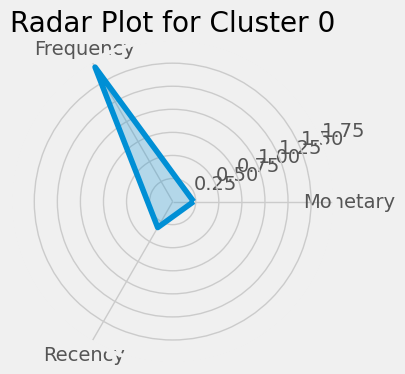

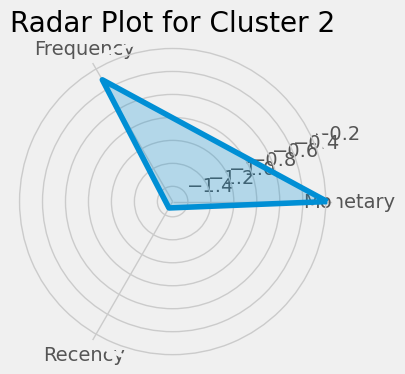

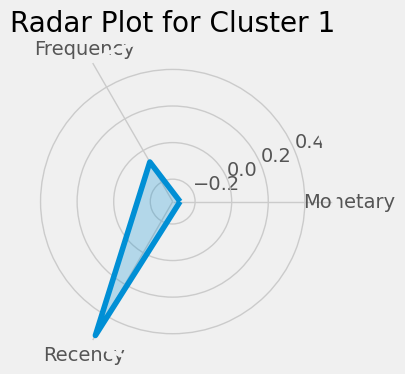

In [147]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu cho các cụm
clusters = df_scaled_kmeans['cluster'].unique()
categories = ['Monetary', 'Frequency', 'Recency']

# Tính giá trị trung bình cho mỗi cụm
cluster_means = df_scaled_kmeans.groupby('cluster')[categories].mean()

# Vẽ biểu đồ radar cho từng cụm
for i in clusters:
    values = cluster_means.loc[i].values
    values = np.concatenate((values, [values[0]]))  # Để khép kín vòng tròn
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]  # Để khép kín vòng tròn

    # Giảm kích thước biểu đồ bằng cách thay đổi figsize
    plt.figure(figsize=(4, 4))  # Kích thước nhỏ hơn (4x4 inch)
    plt.subplot(111, polar=True)
    plt.plot(angles, values, label=f'Cluster {i}')
    plt.fill(angles, values, alpha=0.25)
    plt.title(f'Radar Plot for Cluster {i}')
    plt.xticks(angles[:-1], categories)
    plt.show()

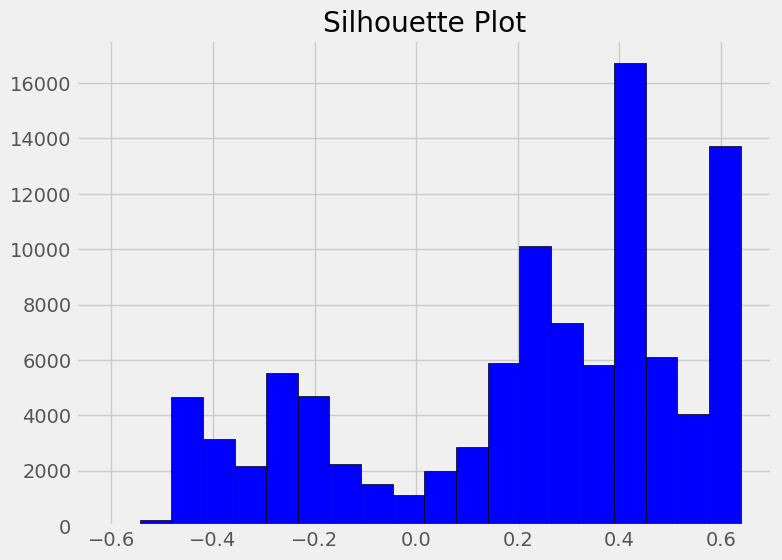

In [148]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Giả sử bạn đã có các nhãn cụm từ K-means trong df['Cluster']
silhouette_values = silhouette_samples(df_scaled_kmeans[['Monetary', 'Frequency',
                                                          'Recency']], df_scaled_kmeans['cluster'])

# Vẽ biểu đồ silhouette
plt.figure(figsize=(8, 6))
plt.hist(silhouette_values, bins=20, color='blue', edgecolor='black')
plt.title('Silhouette Plot')
plt.show()


# PCA K-Means

In [149]:
df_pca_kmeans=data_scaled.sample(n=100000,random_state=42)

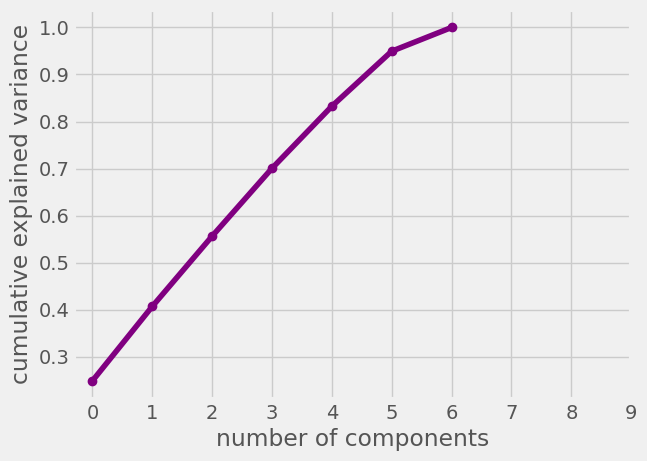

In [150]:
# here we want to check how many component we need to explain 90%  of the variance
from sklearn.decomposition import PCA

plt.style.use("fivethirtyeight")
pca = PCA().fit(df_pca_kmeans.iloc[:,:-1])
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='purple',marker='o')  #EX: cusum([4,2,3,1,6]) ==>[4,6,9,10,16]
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
# x tickes
plt.xticks(np.arange(0, 10, 1))
plt.show();

In [151]:
pca = PCA(n_components=3)
pca_data_kmeans = pca.fit_transform(df_pca_kmeans.iloc[:,:-1])

inertia = []
silhouette = []


for k in range(2,11):
    km = KMeans(init='k-means++', n_clusters=k, random_state=42)
    km.fit(pca_data_kmeans)
    inertia.append(km.inertia_)
    P_score=silhouette_score(pca_data_kmeans, km.labels_)
    silhouette.append(P_score)

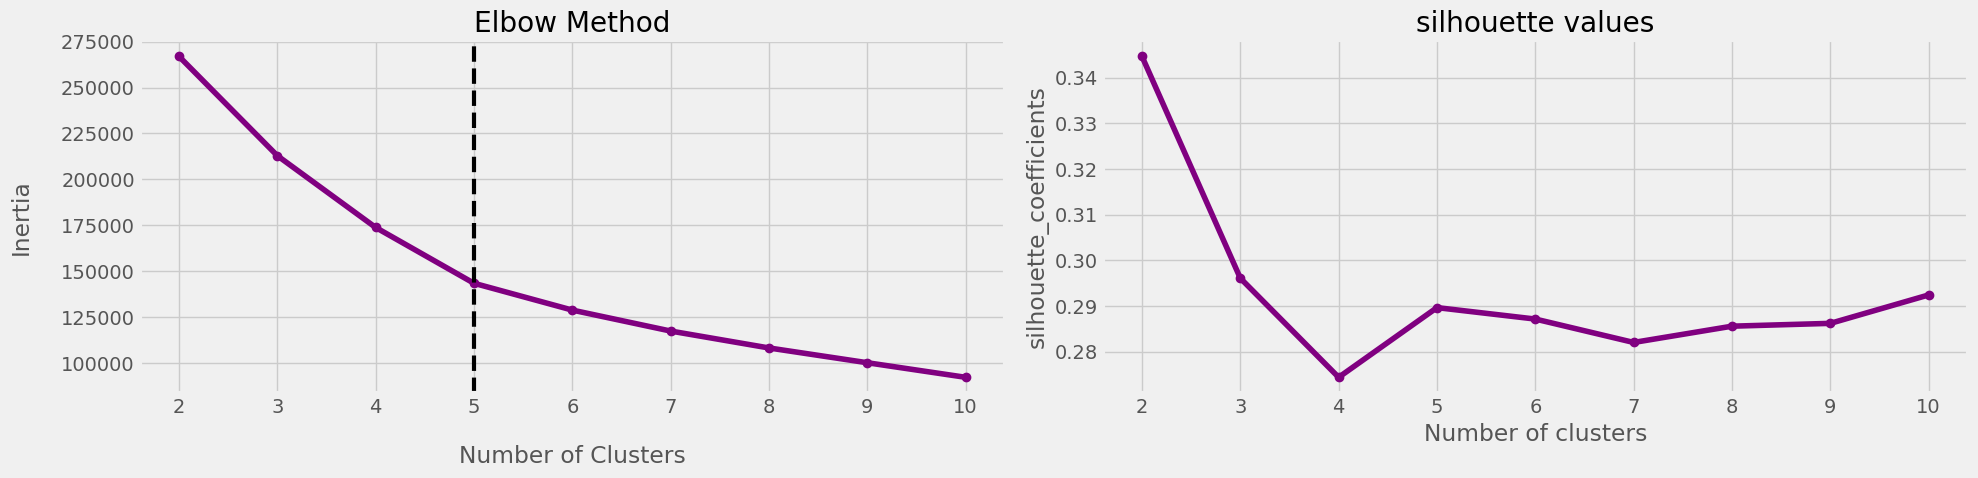

In [152]:
plt.style.use("fivethirtyeight")
fig,ax=plt.subplots(1,2,figsize=(20,5))
Pkl = KneeLocator(range(2,11), inertia, curve='convex', direction="decreasing")
# draw Elbow
ax[0].plot(range(2,11), inertia,color='purple',marker='o',label='Elbow Method')
ax[0].set_xticks(range(2,11))
ax[0].set_xlabel("Number of Clusters", labelpad=20)
ax[0].set_ylabel("Inertia", labelpad=20)
ax[0].set_title("Elbow Method")
ax[0].axvline(x=Pkl.elbow, color='black', label='axvline-fullheight', ls='--', linewidth=3)
# draw silhouette
ax[1].plot(range(2,11), silhouette,color='purple',marker='o',label='silhouette coefficients')
ax[1].set_xticks(range(2,11))
ax[1].set_title("silhouette values")
ax[1].set_xlabel("Number of clusters")
ax[1].set_ylabel("silhouette_coefficients")
plt.tight_layout();

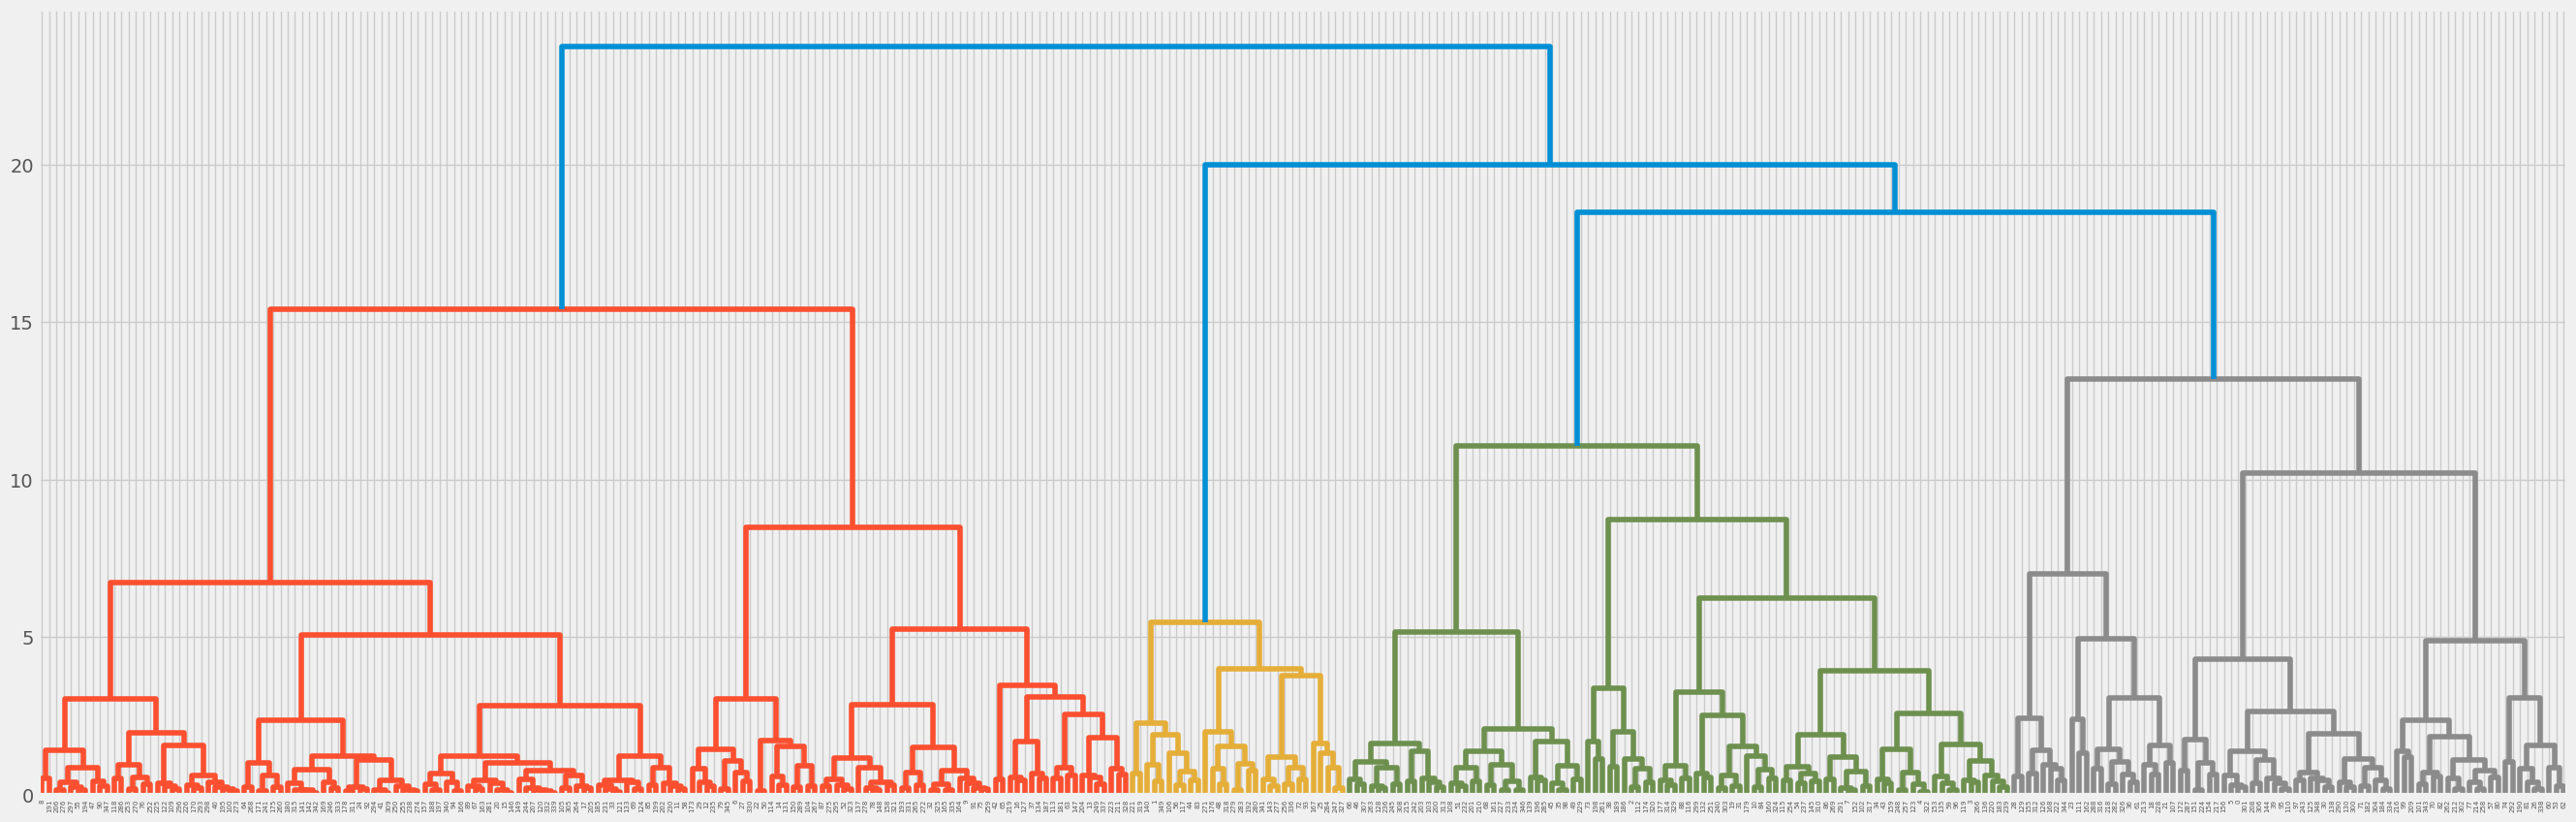

In [153]:
plt.figure(figsize=(30,10))
z = sch.linkage(pca_data_kmeans[:350,:], 'ward')
sch.dendrogram(z);

In [154]:
kmeans = KMeans(n_clusters=5 , **kmeans_set)    
kmeans.fit(pca_data_kmeans)
labels = kmeans.labels_

In [155]:
silhouette_avg = silhouette_score(pca_data_kmeans,labels)
print(f"Chỉ số Silhouette trung bình: {silhouette_avg}")

Chỉ số Silhouette trung bình: 0.28874976567104044


In [156]:

pca_data_kmeans_df = pd.DataFrame(pca_data_kmeans, columns=['PC1', 'PC2', 'PC3'])
pca_data_kmeans_df['cluster'] = labels
pca_data_kmeans_df.head()



PC1       PC2       PC3  cluster
0 -0.290174  1.159149  1.039875        4
1  3.583247 -0.489519 -2.748325        0
2  1.492767 -1.010024  0.931222        2
3  0.095440  0.624735  0.494687        4
4 -0.208800 -0.001256  0.163656        1

In [157]:
pca_data_kmeans_df['cluster'].value_counts()

cluster
1    28879
2    20011
3    18121
4    17561
0    15428
Name: count, dtype: int64

In [158]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Giả sử pca_data_kmeans_df là DataFrame chứa dữ liệu của bạn với các cột 'PC1', 'PC2', 'PC3' và 'cluster'
# cluster_colors là từ điển ánh xạ màu cho các cụm
cluster_colors = {
    0: '#1f77b4',  # xanh
    1: '#ff7f0e',  # cam
    2: '#2ca02c',  # xanh lá
    3: '#d62728',  # đỏ
    4: '#9467bd'   # tím
}

# Ánh xạ màu cho các cụm
pca_data_kmeans_df['color'] = pca_data_kmeans_df['cluster'].map(cluster_colors)

# Tạo biểu đồ 3D scatter plot tương tác với Plotly
fig = px.scatter_3d(
    pca_data_kmeans_df,
    x='PC1',
    y='PC2',
    z='PC3',
    color='cluster',  # Sử dụng cột cluster để xác định màu
    color_discrete_map=cluster_colors,  # Ánh xạ màu từ cluster_colors
    title='3D Scatter Plot of Customer Data by Cluster',
    labels={'PC1': 'PC1', 'PC2': 'PC2', 'PC3': 'PC3'},  # Đặt nhãn cho các trục
    opacity=0.7,  # Độ trong suốt của các điểm
    size_max=10  # Kích thước điểm
)

# Tùy chỉnh layout của biểu đồ
fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    width=800,  # Chiều rộng biểu đồ
    height=800,  # Chiều cao biểu đồ
    title=dict(x=0.5)  # Căn giữa tiêu đề
)

# Hiển thị biểu đồ
fig.show()

In [159]:
# violin plot
plt.figure(figsize=(10, 15))
# Monetary Value
plt.subplot(3, 1, 1)
sns.violinplot(x=pca_data_kmeans_df['cluster'], y=pca_data_kmeans_df['PC1'], palette=cluster_colors, hue=pca_data_kmeans_df["cluster"])
sns.violinplot(y=pca_data_kmeans_df['PC1'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')
# Frequency
plt.subplot(3, 1, 2)
sns.violinplot(x=pca_data_kmeans_df['cluster'], y=pca_data_kmeans_df['PC2'], palette=cluster_colors, hue=pca_data_kmeans_df["cluster"])
sns.violinplot(y=pca_data_kmeans_df['PC2'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

# Recency
plt.subplot(3, 1, 3)
sns.violinplot(x=pca_data_kmeans_df['cluster'], y=pca_data_kmeans_df['PC3'], palette=cluster_colors, hue=pca_data_kmeans_df["cluster"])
sns.violinplot(y=pca_data_kmeans_df['PC3'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()

In [160]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Tạo dữ liệu cho các cụm
# clusters = pca_data_kmeans['cluster'].unique()
# categories = ['Monetary', 'Frequency', 'Recency']

# # Tính giá trị trung bình cho mỗi cụm
# cluster_means = pca_data_kmeans.groupby('cluster')[categories].mean()

# # Vẽ biểu đồ radar cho từng cụm
# for i in clusters:
#     values = cluster_means.loc[i].values
#     values = np.concatenate((values, [values[0]]))  # Để khép kín vòng tròn
#     angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
#     angles += angles[:1]  # Để khép kín vòng tròn

#     # Giảm kích thước biểu đồ bằng cách thay đổi figsize
#     plt.figure(figsize=(4, 4))  # Kích thước nhỏ hơn (4x4 inch)
#     plt.subplot(111, polar=True)
#     plt.plot(angles, values, label=f'Cluster {i}')
#     plt.fill(angles, values, alpha=0.25)
#     plt.title(f'Radar Plot for Cluster {i}')
#     plt.xticks(angles[:-1], categories)
#     plt.show()

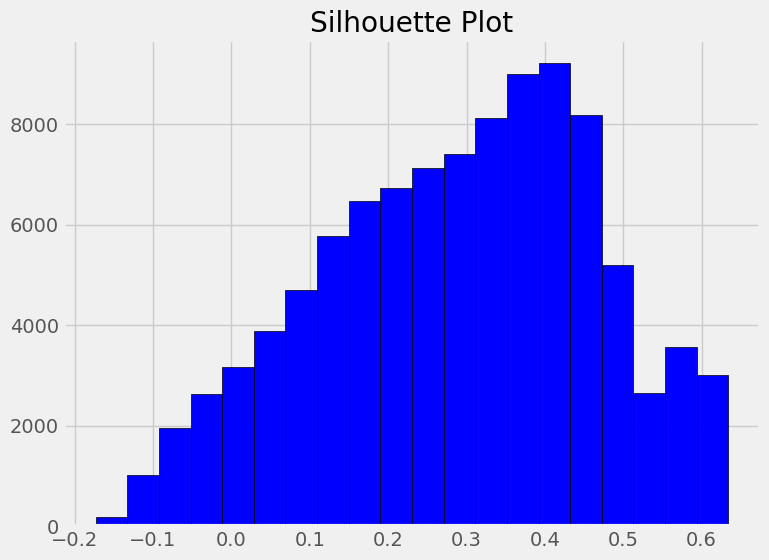

In [163]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Giả sử bạn đã có các nhãn cụm từ K-means trong df['Cluster']
silhouette_values = silhouette_samples(pca_data_kmeans_df[['PC1', 'PC2', 'PC3']], pca_data_kmeans_df['cluster'])

# Vẽ biểu đồ silhouette
plt.figure(figsize=(8, 6))
plt.hist(silhouette_values, bins=20, color='blue', edgecolor='black')
plt.title('Silhouette Plot')
plt.show()

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [ ]:
k=28

In [ ]:
knn = NearestNeighbors(n_neighbors = k)
model = knn.fit(df_scaled_dbscan)
distances, indices = knn.kneighbors(df_scaled_dbscan)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('K-NN Distance')
plt.title('K-Distance Graph');

In [ ]:
dbscan = DBSCAN(eps=0.7, min_samples=250)
labels = dbscan.fit_predict(df_scaled_dbscan)

In [ ]:
print(f"Labels: {labels}")

Labels: [ 0 -1 -1 ... -1 -1  0]


In [ ]:
unique_labels = np.unique(labels)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

In [ ]:
# Hiển thị kết quả
print(f"Số lượng cụm: {num_clusters}")
print(f"Các nhãn cụm: {unique_labels}")

Số lượng cụm: 8
Các nhãn cụm: [-1  0  1  2  3  4  5  6  7]


In [ ]:
filtered_labels = labels[labels != -1]
filtered_data = df_scaled_dbscan[labels != -1]

# Tính chỉ số Silhouette
score = silhouette_score(filtered_data, filtered_labels)

# In kết quả
print(f"Silhouette Score: {score}")

Silhouette Score: 0.36079959394262595


In [ ]:
df_scaled_dbscan['cluster'] = labels

In [ ]:
df_scaled_dbscan['cluster'].value_counts()

cluster
-1    39941
 1    38902
 2    10121
 0     6860
 3     2066
 4      993
 5      415
 7      366
 6      336
Name: count, dtype: int64

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Tạo dữ liệu cho các cụm
# clusters = df_scaled_dbscan['cluster'].unique()
# categories = ['Monetary', 'Frequency', 'Recency']

# # Tính giá trị trung bình cho mỗi cụm
# cluster_means = df_scaled_dbscan.groupby('cluster')[categories].mean()

# # Vẽ biểu đồ radar cho từng cụm
# for i in clusters:
#     values = cluster_means.loc[i].values
#     values = np.concatenate((values, [values[0]]))  # Để khép kín vòng tròn
#     angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
#     angles += angles[:1]  # Để khép kín vòng tròn

#     # Giảm kích thước biểu đồ bằng cách thay đổi figsize
#     plt.figure(figsize=(4, 4))  # Kích thước nhỏ hơn (4x4 inch)
#     plt.subplot(111, polar=True)
#     plt.plot(angles, values, label=f'Cluster {i}')
#     plt.fill(angles, values, alpha=0.25)
#     plt.title(f'Radar Plot for Cluster {i}')
#     plt.xticks(angles[:-1], categories)
#     plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Giả sử bạn đã có các nhãn cụm từ K-means trong df['Cluster']
silhouette_values = silhouette_samples(df_scaled_dbscan[['Monetary', 'Frequency',
                                                          'Recency']], df_pca_kmeans['cluster'])

# Vẽ biểu đồ silhouette
plt.figure(figsize=(8, 6))
plt.hist(silhouette_values, bins=20, color='blue', edgecolor='black')
plt.title('Silhouette Plot')
plt.show()


# PCA_DBSCAN

In [ ]:
df_scaled_dbscan_pca=data_scaled.sample(n=100000,random_state=42)

In [ ]:
n_components = 4

In [ ]:
pca = PCA(n_components=n_components)
pca_data_dbscan = pca.fit_transform(df_scaled_dbscan_pca.iloc[:,:-1])

In [ ]:
print(f"Dữ liệu sau PCA (shape): {pca_data_dbscan.shape}")

Dữ liệu sau PCA (shape): (100000, 4)


In [ ]:
# phương sai giải thích
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


Explained variance ratio: [0.32323412 0.19509401 0.17581014 0.15293655]


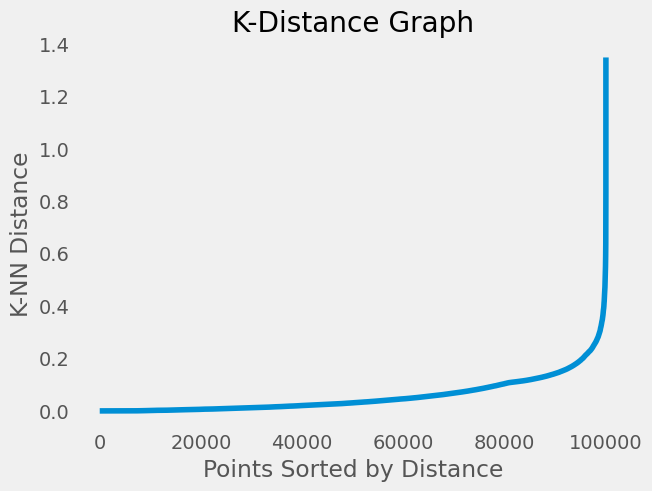

In [ ]:
# tìm eps cho DBSCAN
knn = NearestNeighbors(n_neighbors = k)
model = knn.fit(pca_data_dbscan)
distances, indices = knn.kneighbors(pca_data_dbscan)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('K-NN Distance')
plt.title('K-Distance Graph');

In [ ]:
eps=0.3
minPts=50

In [ ]:

#thực hiện DBSCAN
eps=0.3
minPts=50
dbscan_pca = DBSCAN(eps=eps, min_samples=minPts)
labels_pca = dbscan_pca.fit_predict(pca_data_dbscan)

In [ ]:
# chuyển thành dữ liệu về DataFrame và thêm label 
df_pca = pd.DataFrame(pca_data_dbscan, columns=[f'PC{i+1}' for i in range(n_components)])
df_pca['cluster'] = labels_pca

In [ ]:
# hiển thị và đếm số lượng cụm
unique_labels = set(labels_pca)
print(f"Unique cluster labels: {unique_labels}")
print(f"Number of clusters (including noise): {len(unique_labels)}")

Unique cluster labels: {0, 1, 2, 3, 4, -1}
Number of clusters (including noise): 6


In [ ]:
# Đếm số lượng điểm nhiễu (noise points) có label là -1
noise_points = list(labels_pca).count(-1)
print(f"Number of noise points: {noise_points}")

Number of noise points: 19770


In [ ]:
df_pca['cluster'].value_counts()

cluster
 2    49007
-1    19770
 1    15171
 0    12366
 3     2980
 4      706
Name: count, dtype: int64

In [ ]:
# tính silhouette score trừ các điểm nhiễu
filtered_labels = labels[labels != -1]
filtered_data = df_pca[labels != -1]

# Tính chỉ số Silhouette
score = silhouette_score(filtered_data, filtered_labels)

# In kết quả
print(f"Silhouette Score: {score}")

Silhouette Score: 0.3464155361905604


In [ ]:
df_pca.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'cluster'], dtype='object')

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Tạo dữ liệu cho các cụm
# clusters = df_pca['cluster'].unique()
# categories = ['Monetary', 'Frequency', 'Recency']

# # Tính giá trị trung bình cho mỗi cụm
# cluster_means = df_pca.groupby('cluster')[categories].mean()

# # Vẽ biểu đồ radar cho từng cụm
# for i in clusters:
#     values = cluster_means.loc[i].values
#     values = np.concatenate((values, [values[0]]))  # Để khép kín vòng tròn
#     angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
#     angles += angles[:1]  # Để khép kín vòng tròn

#     # Giảm kích thước biểu đồ bằng cách thay đổi figsize
#     plt.figure(figsize=(4, 4))  # Kích thước nhỏ hơn (4x4 inch)
#     plt.subplot(111, polar=True)
#     plt.plot(angles, values, label=f'Cluster {i}')
#     plt.fill(angles, values, alpha=0.25)
#     plt.title(f'Radar Plot for Cluster {i}')
#     plt.xticks(angles[:-1], categories)
#     plt.show()

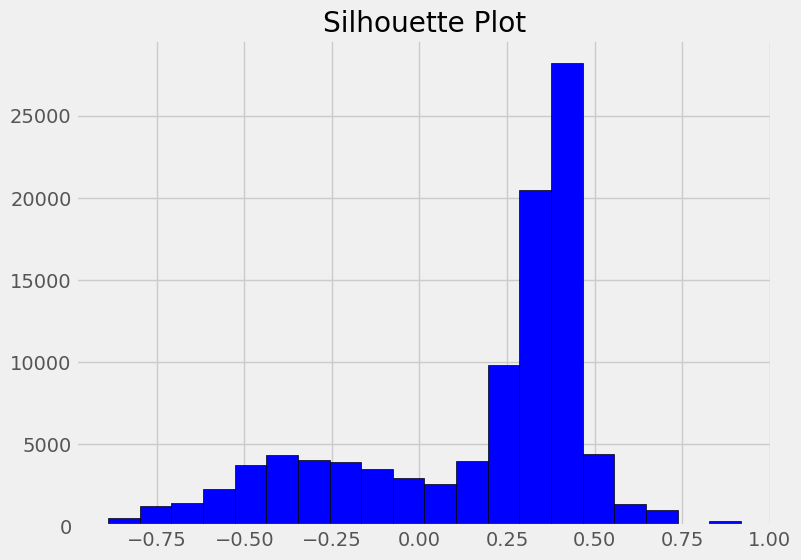

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Giả sử bạn đã có các nhãn cụm từ K-means trong df['Cluster']
silhouette_values = silhouette_samples(df_pca[['PC1', 'PC2', 'PC3', 'PC4']], df_pca['cluster'])

# Vẽ biểu đồ silhouette
plt.figure(figsize=(8, 6))
plt.hist(silhouette_values, bins=20, color='blue', edgecolor='black')
plt.title('Silhouette Plot')
plt.show()
